## <font color= Red> DNSC 6315 Machine Learning 2 

## Final Project - Group 3

##  Group Members:
Abdul Haleem Abdul Salam, 
Sai Nityamani Sahith Matsa, 
Kason Richard, 
Rameen Ridah, 
Zhenqi Zheng

## Data Pre-Processing

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('Housing.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [4]:
df.shape

(545, 13)

In [5]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [6]:
duplicate_rows = df[df.duplicated()]
if duplicate_rows.empty:
    print("No duplicate rows found.")
else:
    print("Duplicate rows found.")

No duplicate rows found.


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,545.0,4.766729e+06,1.870440e+06,1750000.0,3430000.0,4340000.0,5740000.0,13300000.0
area,545.0,5.150541e+03,2.170141e+03,1650.0,3600.0,4600.0,6360.0,16200.0
bedrooms,545.0,2.965138e+00,7.380639e-01,1.0,2.0,3.0,3.0,6.0
bathrooms,545.0,1.286239e+00,5.024696e-01,1.0,1.0,1.0,2.0,4.0
stories,545.0,1.805505e+00,8.674925e-01,1.0,1.0,2.0,2.0,4.0
parking,545.0,6.935780e-01,8.615858e-01,0.0,0.0,0.0,1.0,3.0


In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
df.head(1)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished


# Plot of data

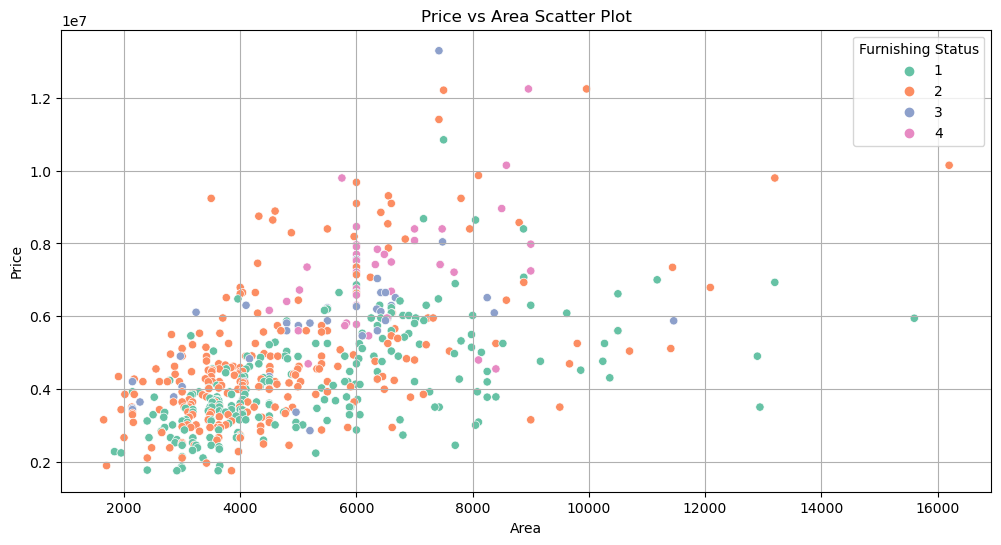

In [10]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='area', y='price', hue='stories', data=df,palette="Set2")
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Price vs Area Scatter Plot')
plt.legend(title='Furnishing Status')
plt.grid(True)
plt.show()

Text(0.5, 1.0, 'Hot water heating')

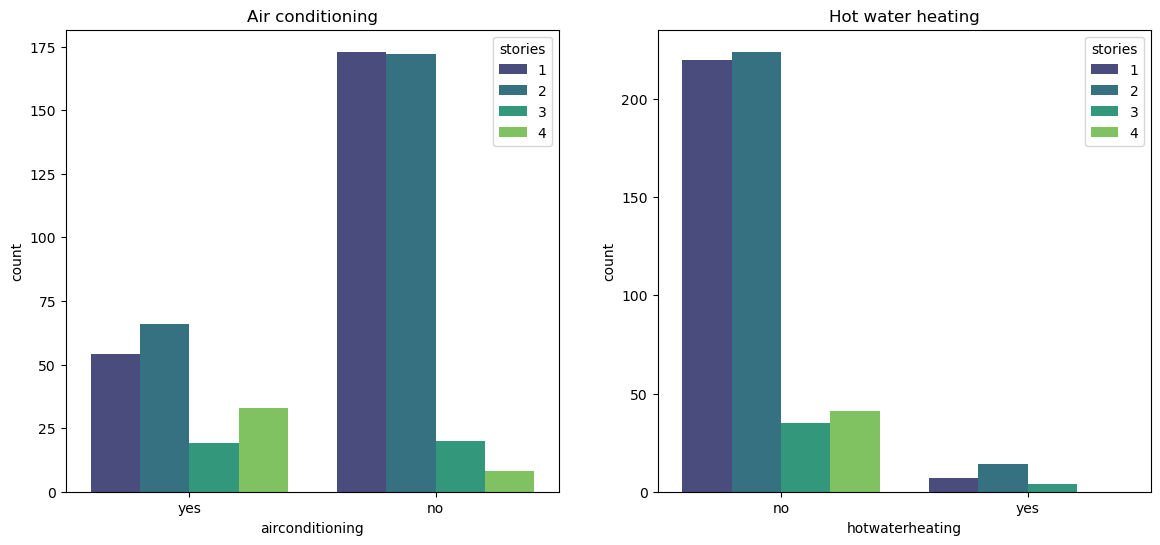

In [11]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Plot the first countplot on the first subplot (axs[0])
sns.countplot(x=df["airconditioning"], hue=df["stories"], palette="viridis", ax=axs[0])

# Plot the second countplot on the second subplot (axs[1])
sns.countplot(x=df["hotwaterheating"], hue=df["stories"], palette="viridis", ax=axs[1])

# Optionally, add titles to the subplots
axs[0].set_title("Air conditioning")
axs[1].set_title("Hot water heating")

<Axes: xlabel='basement'>

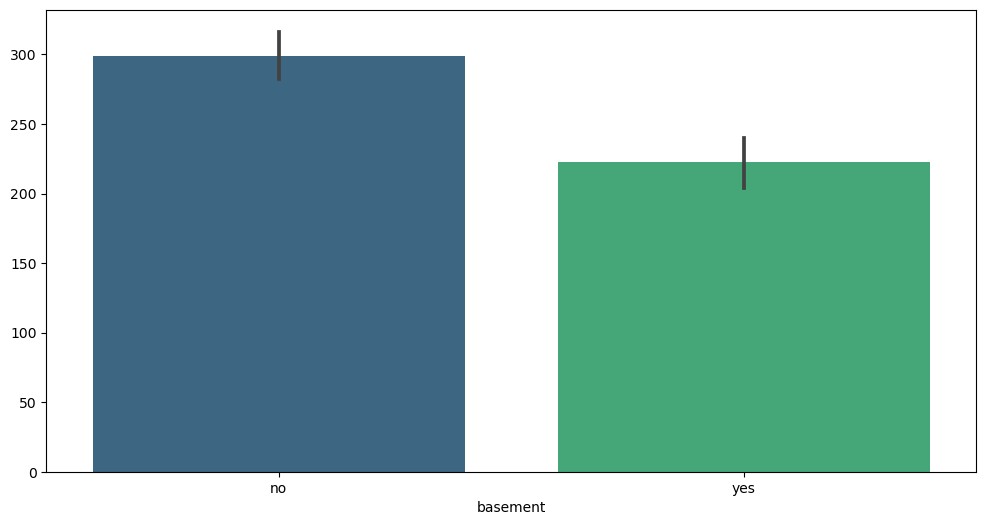

In [12]:
plt.figure(figsize=(12, 6))

sns.barplot(y=df["stories"].index,x=df["basement"],palette="viridis")

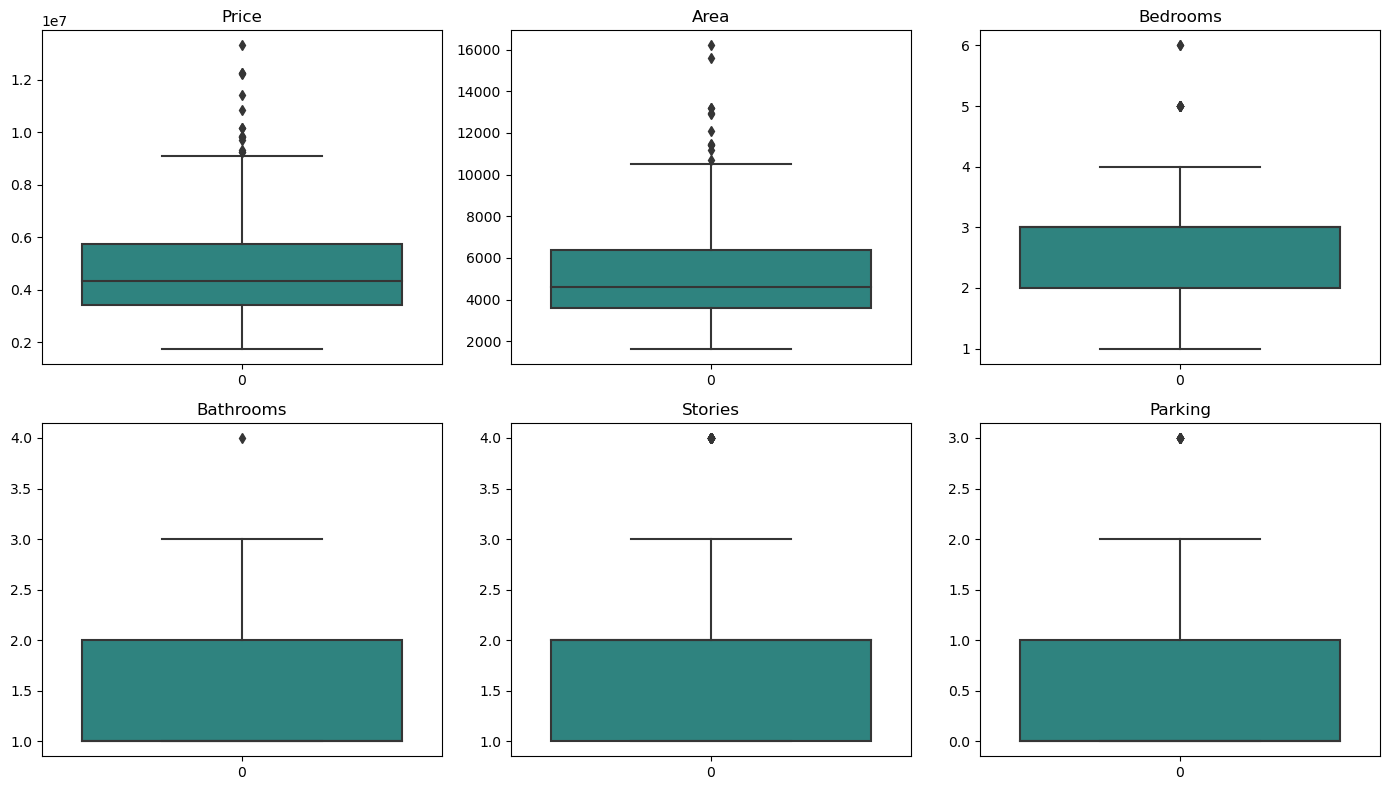

In [13]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(14, 8))

# List of column names you want to plot
columns = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']

counter = 0

for i in range(2):
    for j in range(3):
        sns.boxplot(df[columns[counter]], ax=axs[i, j], palette="viridis")
        axs[i, j].set_title(columns[counter].capitalize())  
        counter += 1

plt.tight_layout() 
plt.show()


In [14]:
df.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [17]:
df.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

In [18]:
df["mainroad"].value_counts()

mainroad
yes    468
no      77
Name: count, dtype: int64

In [19]:
df[['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea']] = df[['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea']].replace({'yes': 1, 'no': 0}).astype(int)

In [20]:
df['furnishingstatus'] = df['furnishingstatus'].map({'furnished': 1, 'semi-furnished': 0}).fillna(0).astype(int)

In [21]:
# df['furnishingstatus']=LabelEncoder().fit_transform(df['furnishingstatus'])
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1


In [22]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error, r2_score

In [23]:
# Assuming you have a DataFrame 'df' with predictive features and a target column named 'target'
X = df.drop('price', axis=1)
y = df['price']

# Splitting data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling (important for Ridge Regression and SVC)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initializing models

In [24]:
predictions = {}  # Dictionary to store predictions from each model
results = {}

In [25]:
# Initializing models
models = {
    'Linear Regression': LinearRegression(n_jobs=5),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'Ridge Regression': Ridge(alpha=1.0),
    'SVC': SVC(kernel='linear')
}

# Train models and store predictions
predictions = {}
for name, model in models.items():
    if name in ['SVC', 'Ridge Regression']:  # Use scaled data for these models
        model.fit(X_train_scaled, y_train)
        predictions[name] = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        predictions[name] = model.predict(X_test)
    results[name] = predictions

# Evaluate each model's performance

In [26]:

for name, pred in predictions.items():
    mse = mean_squared_error(y_test, pred)
    r2 = r2_score(y_test, pred)
    print(f'{name} - MSE: {mse}, R^2: {r2}')


Linear Regression - MSE: 1809581673897.1033, R^2: 0.6419909931610206
Random Forest - MSE: 2043974419276.605, R^2: 0.5956185551583418
Gradient Boosting - MSE: 1772067436523.773, R^2: 0.6494128382526677
Ridge Regression - MSE: 1810180513368.6138, R^2: 0.6418725183071117
SVC - MSE: 3059131362385.3213, R^2: 0.3947791378330361


In [27]:
import pandas as pd

# Assuming y_test is your actual test labels
comparison_df = pd.DataFrame({
    'Actual': y_test.reset_index(drop=True),  # Reset index for clean merge
})

# Add each model's predictions to the DataFrame
for name, pred in predictions.items():
    comparison_df[name + ' Predictions'] = pd.Series(pred)

# Display the DataFrame
comparison_df.head()

,Actual,Linear Regression Predictions,Random Forest Predictions,Gradient Boosting Predictions,Ridge Regression Predictions,SVC Predictions
0,4060000,5.352089e+06,5.535110e+06,4.654856e+06,5.350197e+06,5215000
1,6650000,7.215251e+06,6.956139e+06,7.220581e+06,7.211142e+06,7840000
2,3710000,2.961456e+06,3.369644e+06,3.385782e+06,2.963002e+06,3500000
3,6440000,4.471279e+06,4.135600e+06,4.338589e+06,4.471748e+06,2653000
4,2800000,3.258991e+06,3.681370e+06,3.513210e+06,3.261976e+06,3710000


# Bagging

In [28]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

# Example with Decision Tree Regressor
bagging_model = BaggingRegressor(base_estimator=DecisionTreeRegressor(),
                                 n_estimators=100, random_state=42)
bagging_model.fit(X_train, y_train)


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingRegressor(base_estimator=DecisionTreeRegressor(), n_estimators=100,
                 random_state=42)

# Boosting

In [29]:
from sklearn.ensemble import AdaBoostRegressor

# Example with AdaBoost
boosting_model = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(),
                                   n_estimators=100, random_state=42)
boosting_model.fit(X_train, y_train)


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoostRegressor(base_estimator=DecisionTreeRegressor(), n_estimators=100,
                  random_state=42)

# Prediction for boosting and Bagging

In [30]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor, BaggingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

bagging_model = BaggingRegressor(base_estimator=DecisionTreeRegressor(),
                                 n_estimators=100, random_state=42)
bagging_model.fit(X_train, y_train)
bagging_predictions = bagging_model.predict(X_test)

boosting_model = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(),
                                   n_estimators=100, random_state=42)
boosting_model.fit(X_train, y_train)
boosting_predictions = boosting_model.predict(X_test)

bagging_mse = mean_squared_error(y_test, bagging_predictions)
bagging_r2 = r2_score(y_test, bagging_predictions)
boosting_mse = mean_squared_error(y_test, boosting_predictions)
boosting_r2 = r2_score(y_test, boosting_predictions)

print(f'Bagging Model - MSE: {bagging_mse}, R^2: {bagging_r2}')
print(f'Boosting Model - MSE: {boosting_mse}, R^2: {boosting_r2}')

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Bagging Model - MSE: 2044696560364.638, R^2: 0.5954756862193746
Boosting Model - MSE: 1946757552824.0088, R^2: 0.6148520135364524


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [31]:
X_test.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
316,5900,4,2,2,0,0,1,0,0,1,0,0
77,6500,3,2,3,1,0,0,0,1,0,1,1
360,4040,2,1,1,1,0,0,0,0,0,0,0
90,5000,3,1,2,1,0,0,0,1,0,0,0
493,3960,3,1,1,1,0,0,0,0,0,0,1


In [32]:
comparison_df["Bagging_Predicted_Price"] = bagging_predictions

In [33]:
comparison_df["Boosting_Predicted_Price"] = boosting_predictions

# Actual vs Predicted for all models

In [34]:
comparison_df

,Actual,Linear Regression Predictions,Random Forest Predictions,Gradient Boosting Predictions,Ridge Regression Predictions,SVC Predictions,Bagging_Predicted_Price,Boosting_Predicted_Price
0,4060000,5.352089e+06,5.535110e+06,4.654856e+06,5.350197e+06,5215000,5.396125e+06,5600000.0
1,6650000,7.215251e+06,6.956139e+06,7.220581e+06,7.211142e+06,7840000,7.117250e+06,7490000.0
2,3710000,2.961456e+06,3.369644e+06,3.385782e+06,2.963002e+06,3500000,3.372254e+06,3356500.0
3,6440000,4.471279e+06,4.135600e+06,4.338589e+06,4.471748e+06,2653000,4.258007e+06,4200000.0
4,2800000,3.258991e+06,3.681370e+06,3.513210e+06,3.261976e+06,3710000,3.878350e+06,3605000.0
...,...,...,...,...,...,...,...,...
104,9100000,4.892784e+06,6.196435e+06,6.135150e+06,4.893733e+06,4165000,6.404265e+06,6020000.0
105,3773000,4.307336e+06,5.292280e+06,4.700938e+06,4.308536e+06,2975000,5.481910e+06,4830000.0
106,7910000,6.960968e+06,7.349300e+06,7.542039e+06,6.958226e+06,6755000,7.275450e+06,7525000.0
107,7350000,6.292043e+06,7.344680e+06,7.060529e+06,6.291006e+06,6195000,7.417900e+06,7140000.0


# Plotting

In [35]:
import matplotlib.pyplot as plt


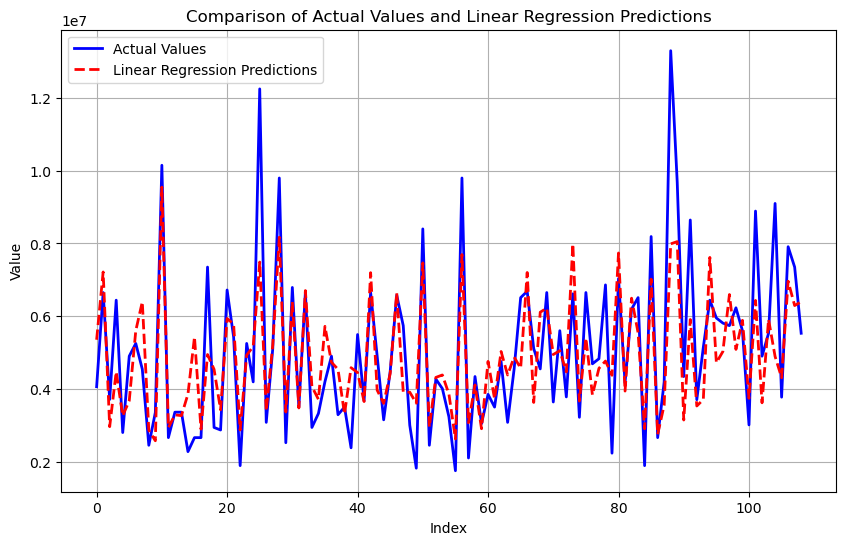

In [36]:
plt.figure(figsize=(10, 6))  # Set the figure size for better visibility

# Plot actual values
plt.plot(comparison_df['Actual'], label='Actual Values', color='blue', linewidth=2)

# Plot Linear Regression predictions
plt.plot(comparison_df['Linear Regression Predictions'], label='Linear Regression Predictions', color='red', linestyle='--', linewidth=2)

plt.title('Comparison of Actual Values and Linear Regression Predictions')  # Title of the plot
plt.xlabel('Index')  # Label for the X-axis
plt.ylabel('Value')  # Label for the Y-axis
plt.legend()  # Add a legend to the plot
plt.grid(True)  # Add grid for better readability of plotted values

plt.show()  # Display the plot

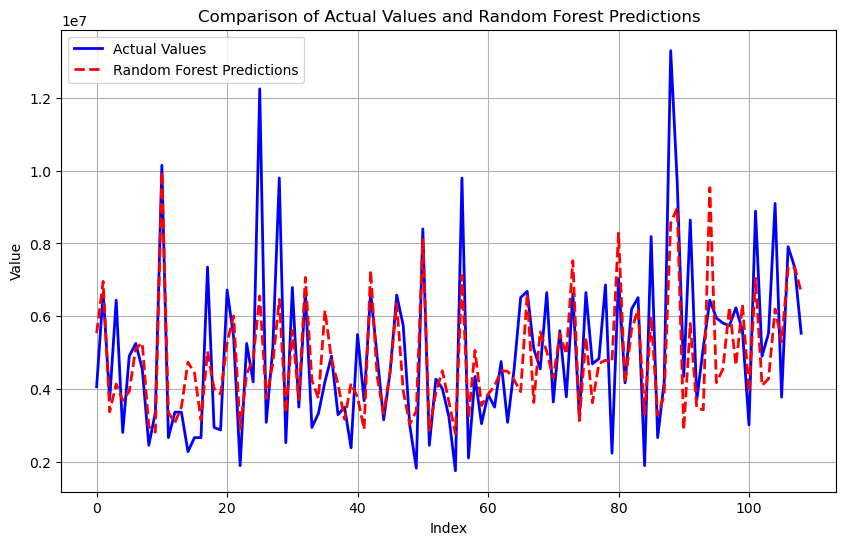

In [37]:
plt.figure(figsize=(10, 6))  # Set the figure size for better visibility

# Plot actual values
plt.plot(comparison_df['Actual'], label='Actual Values', color='blue', linewidth=2)

# Plot Linear Regression predictions
plt.plot(comparison_df['Random Forest Predictions'], label='Random Forest Predictions', color='red', linestyle='--', linewidth=2)

plt.title('Comparison of Actual Values and Random Forest Predictions')  # Title of the plot
plt.xlabel('Index')  # Label for the X-axis
plt.ylabel('Value')  # Label for the Y-axis
plt.legend()  # Add a legend to the plot
plt.grid(True)  # Add grid for better readability of plotted values

plt.show()  # Display the plot

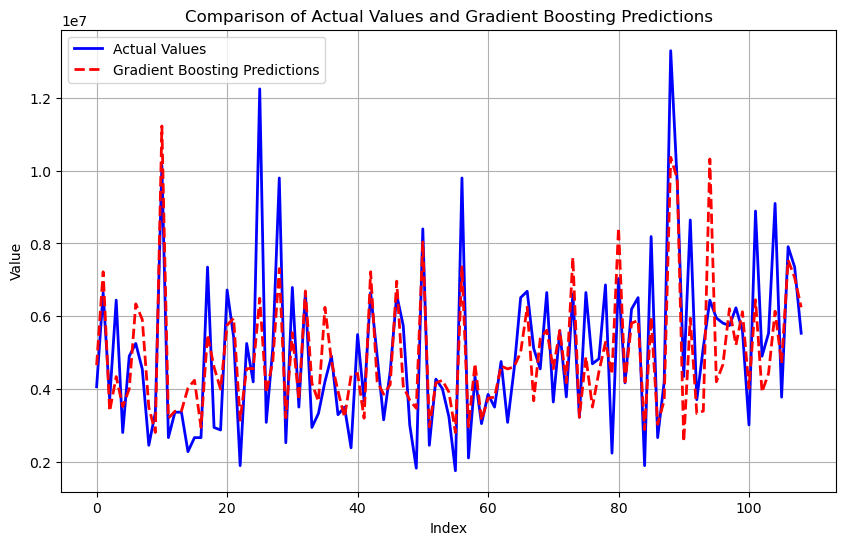

In [38]:
plt.figure(figsize=(10, 6))  # Set the figure size for better visibility

# Plot actual values
plt.plot(comparison_df['Actual'], label='Actual Values', color='blue', linewidth=2)

# Plot Linear Regression predictions
plt.plot(comparison_df['Gradient Boosting Predictions'], label='Gradient Boosting Predictions', color='red', linestyle='--', linewidth=2)

plt.title('Comparison of Actual Values and Gradient Boosting Predictions')  # Title of the plot
plt.xlabel('Index')  # Label for the X-axis
plt.ylabel('Value')  # Label for the Y-axis
plt.legend()  # Add a legend to the plot
plt.grid(True)  # Add grid for better readability of plotted values

plt.show()  # Display the plot

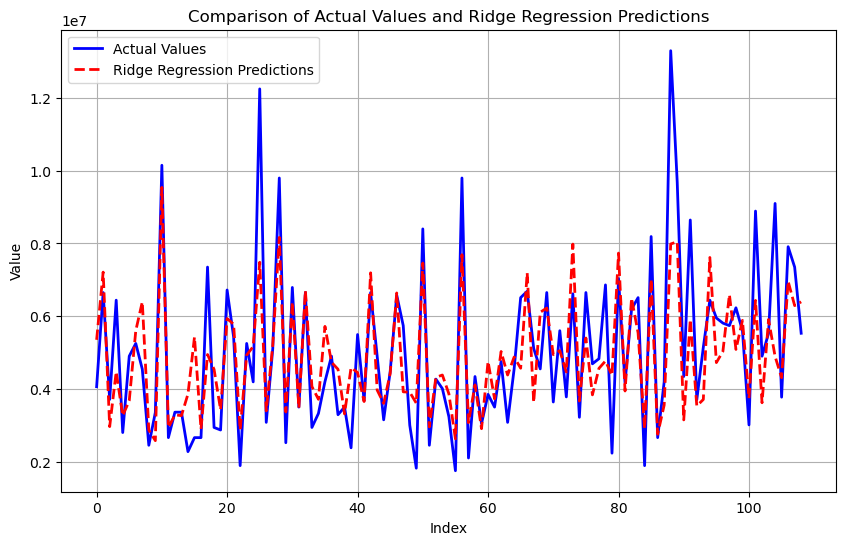

In [39]:
plt.figure(figsize=(10, 6))  # Set the figure size for better visibility

# Plot actual values
plt.plot(comparison_df['Actual'], label='Actual Values', color='blue', linewidth=2)

# Plot Linear Regression predictions
plt.plot(comparison_df['Ridge Regression Predictions'], label='Ridge Regression Predictions', color='red', linestyle='--', linewidth=2)

plt.title('Comparison of Actual Values and Ridge Regression Predictions')  # Title of the plot
plt.xlabel('Index')  # Label for the X-axis
plt.ylabel('Value')  # Label for the Y-axis
plt.legend()  # Add a legend to the plot
plt.grid(True)  # Add grid for better readability of plotted values

plt.show()  # Display the plot

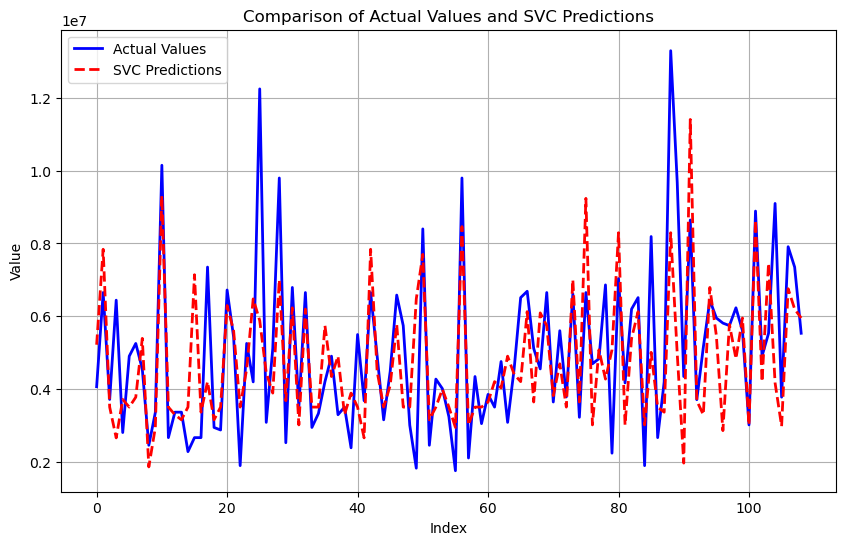

In [40]:
plt.figure(figsize=(10, 6))  # Set the figure size for better visibility

# Plot actual values
plt.plot(comparison_df['Actual'], label='Actual Values', color='blue', linewidth=2)

# Plot Linear Regression predictions
plt.plot(comparison_df['SVC Predictions'], label='SVC Predictions', color='red', linestyle='--', linewidth=2)

plt.title('Comparison of Actual Values and SVC Predictions')  # Title of the plot
plt.xlabel('Index')  # Label for the X-axis
plt.ylabel('Value')  # Label for the Y-axis
plt.legend()  # Add a legend to the plot
plt.grid(True)  # Add grid for better readability of plotted values

plt.show()  # Display the plot

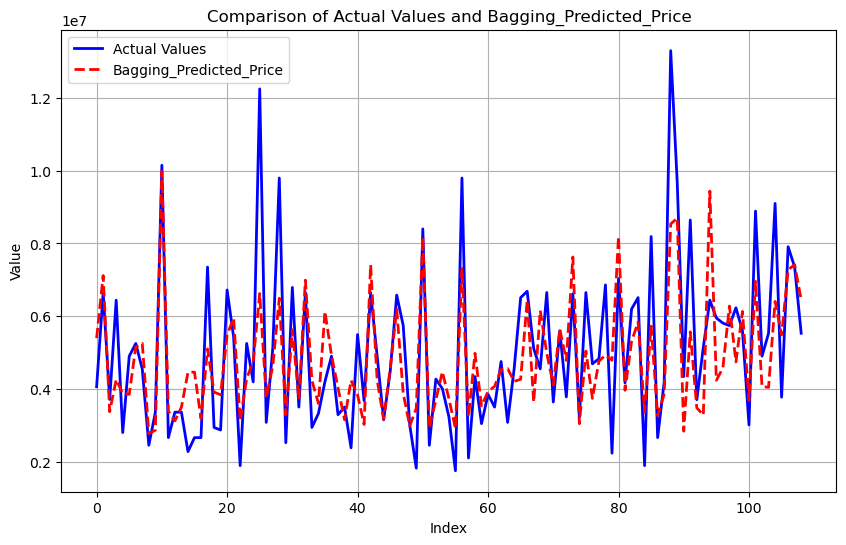

In [41]:
plt.figure(figsize=(10, 6))  # Set the figure size for better visibility

# Plot actual values
plt.plot(comparison_df['Actual'], label='Actual Values', color='blue', linewidth=2)

# Plot Linear Regression predictions
plt.plot(comparison_df['Bagging_Predicted_Price'], label='Bagging_Predicted_Price', color='red', linestyle='--', linewidth=2)

plt.title('Comparison of Actual Values and Bagging_Predicted_Price')  # Title of the plot
plt.xlabel('Index')  # Label for the X-axis
plt.ylabel('Value')  # Label for the Y-axis
plt.legend()  # Add a legend to the plot
plt.grid(True)  # Add grid for better readability of plotted values

plt.show()  # Display the plot

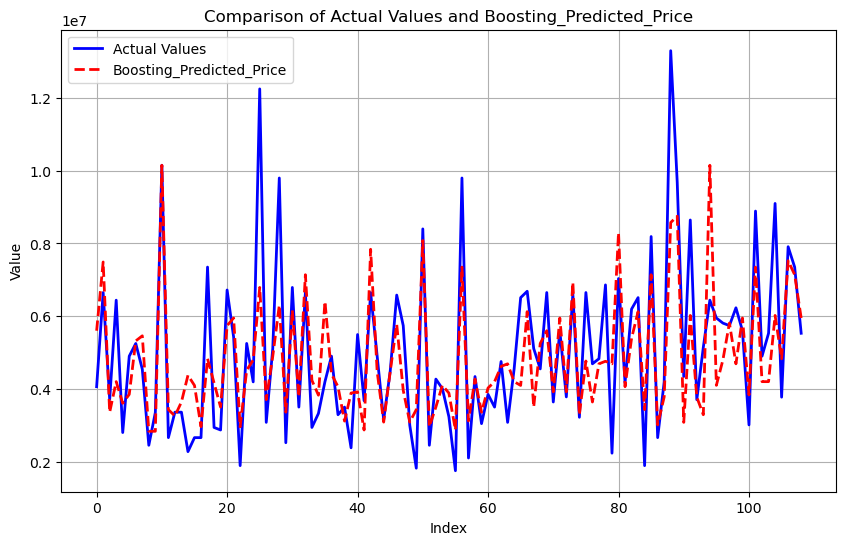

In [42]:
plt.figure(figsize=(10, 6))  # Set the figure size for better visibility

# Plot actual values
plt.plot(comparison_df['Actual'], label='Actual Values', color='blue', linewidth=2)

# Plot Linear Regression predictions
plt.plot(comparison_df['Boosting_Predicted_Price'], label='Boosting_Predicted_Price', color='red', linestyle='--', linewidth=2)

plt.title('Comparison of Actual Values and Boosting_Predicted_Price')  # Title of the plot
plt.xlabel('Index')  # Label for the X-axis
plt.ylabel('Value')  # Label for the Y-axis
plt.legend()  # Add a legend to the plot
plt.grid(True)  # Add grid for better readability of plotted values


# Picking the Best Model

In [43]:
# Bagging Model - MSE: 1977244607051.165, R^2: 0.6088204316726703
# Boosting Model - MSE: 2077443429238.3057, R^2: 0.5889970209169679
# Linear Regression - MSE: 1771751116594.0342, R^2: 0.6494754192267805
# Random Forest - MSE: 1963538216518.6526, R^2: 0.6115321143409216
# Gradient Boosting - MSE: 1694870370248.4102, R^2: 0.6646855642239725
# Ridge Regression - MSE: 1772333186531.0132, R^2: 0.649360262070265
# SVC - MSE: 3065089133027.523, R^2: 0.3936004479836879

In [44]:
# gradient Boosting

In [45]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np


param_grid = {
    'model__learning_rate': [0.005, 0.01, 0.05, 0.1],
    'model__n_estimators': [100, 150, 200, 250, 300],
    'model__max_depth': [3, 4, 5, 6],
    'model__min_samples_split': [2, 4, 6, 8,10],
    'model__min_samples_leaf': [1, 2, 3, 4,5]
}


pipe = Pipeline([
    ('scaler', StandardScaler()), 
    ('model', GradientBoostingRegressor(random_state=42))
])


kf = KFold(n_splits=5, shuffle=True, random_state=42)


grid_search = GridSearchCV(estimator=pipe, param_grid=param_grid, cv=kf, scoring='r2', n_jobs=-1, verbose=1)


grid_search.fit(X_train, y_train)


print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)


best_model = grid_search.best_estimator_
predictions = best_model.predict(X_test)

Fitting 5 folds for each of 2000 candidates, totalling 10000 fits
Best parameters: {'model__learning_rate': 0.05, 'model__max_depth': 4, 'model__min_samples_leaf': 3, 'model__min_samples_split': 10, 'model__n_estimators': 150}
Best score: 0.6277050597900212


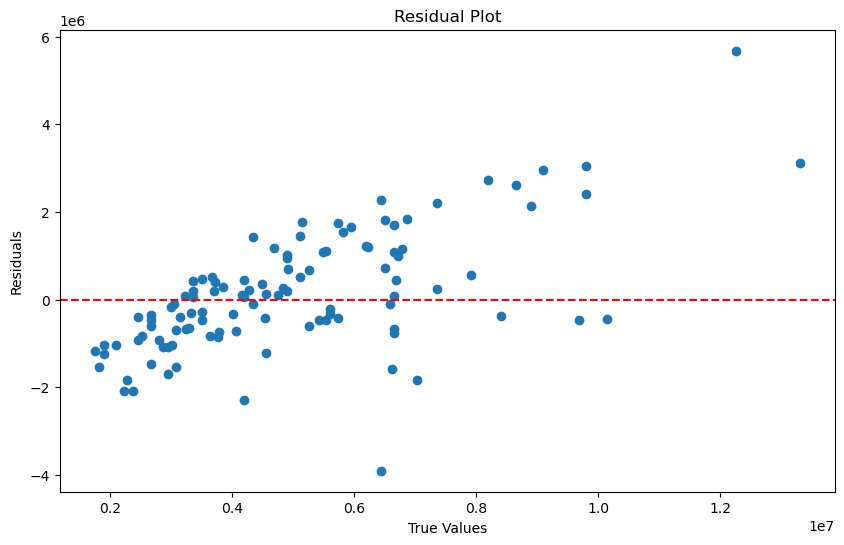

In [46]:
import matplotlib.pyplot as plt

# Calculate residuals
residuals = y_test - predictions

# Plot residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_test, residuals)
plt.title('Residual Plot')
plt.xlabel('True Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

In [47]:
comparison_df["Hyper_GB_Price"] = predictions

In [48]:
comparison_df

,Actual,Linear Regression Predictions,Random Forest Predictions,Gradient Boosting Predictions,Ridge Regression Predictions,SVC Predictions,Bagging_Predicted_Price,Boosting_Predicted_Price,Hyper_GB_Price
0,4060000,5.352089e+06,5.535110e+06,4.654856e+06,5.350197e+06,5215000,5.396125e+06,5600000.0,4.776875e+06
1,6650000,7.215251e+06,6.956139e+06,7.220581e+06,7.211142e+06,7840000,7.117250e+06,7490000.0,7.328039e+06
2,3710000,2.961456e+06,3.369644e+06,3.385782e+06,2.963002e+06,3500000,3.372254e+06,3356500.0,3.314137e+06
3,6440000,4.471279e+06,4.135600e+06,4.338589e+06,4.471748e+06,2653000,4.258007e+06,4200000.0,4.169507e+06
4,2800000,3.258991e+06,3.681370e+06,3.513210e+06,3.261976e+06,3710000,3.878350e+06,3605000.0,3.719350e+06
...,...,...,...,...,...,...,...,...,...
104,9100000,4.892784e+06,6.196435e+06,6.135150e+06,4.893733e+06,4165000,6.404265e+06,6020000.0,6.151137e+06
105,3773000,4.307336e+06,5.292280e+06,4.700938e+06,4.308536e+06,2975000,5.481910e+06,4830000.0,4.619191e+06
106,7910000,6.960968e+06,7.349300e+06,7.542039e+06,6.958226e+06,6755000,7.275450e+06,7525000.0,7.339269e+06
107,7350000,6.292043e+06,7.344680e+06,7.060529e+06,6.291006e+06,6195000,7.417900e+06,7140000.0,7.118614e+06


## Hyperparameter and Cross Validation

In [49]:
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import pandas as pd

# Read the data
df = pd.read_csv('Housing.csv')

# Preprocessing
df[['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea']] = df[['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea']].replace({'yes': 1, 'no': 0}).astype(int)
df['furnishingstatus'] = LabelEncoder().fit_transform(df['furnishingstatus'])

# Define models
models = {
    'Gradient Boosting': GradientBoostingRegressor()
}

# Split data
x = df.drop("price",axis=1)
y = df["price"]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

# Define hyperparameters grid
param_grid = {
    'model__learning_rate': [0.05, 0.1, 0.2],
    'model__n_estimators': [100, 200, 300],
    'model__max_depth': [3, 4, 5],
    'model__min_samples_leaf': [1, 2, 4]
}

# Perform hyperparameter tuning and cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

for name, model in models.items():
    pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('model', model)
    ])
    
    grid_search = GridSearchCV(estimator=pipe, param_grid=param_grid, cv=kfold, scoring='r2', n_jobs=-1)
    grid_result = grid_search.fit(X_train, y_train)
    
    print(f"Best parameters for {name}: {grid_result.best_params_}")
    print(f"Best R2 score for {name}: {grid_result.best_score_:.4f}")

# Re-fit the best model
best_model = grid_result.best_estimator_
best_model.fit(X_train, y_train)

# Evaluate the best model on the test set
y_pred = best_model.predict(X_test)
print(f"R2 Score on Test Set: {r2_score(y_test, y_pred):.4f}")
print(f"Mean Absolute Error on Test Set: {mean_absolute_error(y_test, y_pred):.4f}")
print(f"Mean Squared Error on Test Set: {mean_squared_error(y_test, y_pred):.4f}")

# Predict on new data
data_to_predict = [[7420, 4, 2, 3, 1, 0, 0, 0, 1, 2, 1, 1]]
prediction = best_model.predict(data_to_predict)
print("Predicted Price:", prediction)


Best parameters for Gradient Boosting: {'model__learning_rate': 0.05, 'model__max_depth': 5, 'model__min_samples_leaf': 4, 'model__n_estimators': 100}
Best R2 score for Gradient Boosting: 0.6309
R2 Score on Test Set: 0.6546
Mean Absolute Error on Test Set: 999392.9114
Mean Squared Error on Test Set: 1745884682420.5295
Predicted Price: [10679538.76240881]


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


### <font color= green> Predicting Data based on trained Cross validated Model

### <font color= red> Data 1

In [50]:
# Predict on new data 1
data_to_predict = [[7420, 4, 2, 3, 1, 0, 0, 0, 1, 2, 1, 1]]
prediction1 = best_model.predict(data_to_predict)
print("Predicted Price:", prediction1)

Predicted Price: [10679538.76240881]


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [51]:
# Previous price
previous_price_1 = 13300000

# Predict on new data 1
data_to_predict = [[7420, 4, 2, 3, 1, 0, 0, 0, 1, 2, 1, 1]]
prediction1 = best_model.predict(data_to_predict)
print("Predicted Price:", prediction1)

# New price 1 = prediction1
new_price_1 = prediction1

# Difference in data 1 = New price 1 - Previous price 1
difference_in_price_1 = new_price_1 - previous_price_1

print("Difference in price:", difference_in_price_1)

Predicted Price: [10679538.76240881]
Difference in price: [-2620461.23759119]


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


### <font color= red> Data 2

In [52]:
# Predict on new data 2
data_to_predict = [[8960, 4, 4, 4, 1, 0, 0, 0, 1, 3, 0, 1]]
prediction2 = best_model.predict(data_to_predict)
print("Predicted Price:", prediction2)

Predicted Price: [11142564.42912528]


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [53]:
# Previous price
previous_price_2 = 12250000

# Predict on new data 2
data_to_predict = [[8960, 4, 4, 4, 1, 0, 0, 0, 1, 3, 0, 1]]
prediction2 = best_model.predict(data_to_predict)
print("Predicted Price:", prediction2)

# New price 2 = prediction2
new_price_2 = prediction2

# Difference in data 2 = New price 2 - Previous price 2
difference_in_price_2 = new_price_2 - previous_price_2

print("Difference in price:", difference_in_price_2)

Predicted Price: [11142564.42912528]
Difference in price: [-1107435.57087472]


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


### <font color= red> Data 3

In [54]:
# Predict on new data 3
data_to_predict = [[9960, 3, 2, 2, 1, 0, 1, 0, 0, 2, 1, 0]]
prediction3 = best_model.predict(data_to_predict)
print("Predicted Price:", prediction3)

Predicted Price: [6825461.48799357]


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [55]:
# Previous price
previous_price_3 = 12250000

# Predict on new data 3
data_to_predict = [[9960, 3, 2, 2, 1, 0, 1, 0, 0, 2, 1, 0]]
prediction3 = best_model.predict(data_to_predict)
print("Predicted Price:", prediction3)

# New price 3 = prediction3
new_price_3 = prediction3

# Difference in data 3 = New price 3 - Previous price 3
difference_in_price_3 = new_price_3 - previous_price_3

print("Difference in price:", difference_in_price_3)

Predicted Price: [6825461.48799357]
Difference in price: [-5424538.51200643]


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


### <font color= red> Data 4

In [56]:
# Predict on new data 4
data_to_predict = [[7500, 4, 2, 2, 1, 0, 1, 0, 1, 3, 1, 1]]
prediction4 = best_model.predict(data_to_predict)
print("Predicted Price:", prediction4)

Predicted Price: [11290257.23184058]


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [57]:
# Previous price
previous_price_4 = 12215000

# Predict on new data 4
data_to_predict = [[7500, 4, 2, 2, 1, 0, 1, 0, 1, 3, 1, 1]]
prediction4 = best_model.predict(data_to_predict)
print("Predicted Price:", prediction4)

# New price 4 = prediction4
new_price_4 = prediction4

# Difference in data 4 = New price 4 - Previous price 4
difference_in_price_4 = new_price_4 - previous_price_4

print("Difference in price:", difference_in_price_4)

Predicted Price: [11290257.23184058]
Difference in price: [-924742.76815942]


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


### <font color= red> Data 5

In [58]:
# Predict on new data 5
data_to_predict = [[7420, 4, 1, 2, 1, 1, 1, 0, 1, 2, 0, 1]]
prediction5 = best_model.predict(data_to_predict)
print("Predicted Price:", prediction5)

Predicted Price: [9124701.49742561]


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [59]:
# Previous price
previous_price_5 = 11410000

# Predict on new data 5
data_to_predict = [[7420, 4, 1, 2, 1, 1, 1, 0, 1, 2, 0, 1]]
prediction5 = best_model.predict(data_to_predict)
print("Predicted Price:", prediction5)

# New price 5 = prediction5
new_price_5 = prediction5

# Difference in data 5 = New price 5 - Previous price 5
difference_in_price_5 = new_price_5 - previous_price_5

print("Difference in price:", difference_in_price_5)

Predicted Price: [9124701.49742561]
Difference in price: [-2285298.50257439]


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


## Observation

### After running our trained model on five data points from the original dataset, we noticed a consistent trend: the original dataset consistently predicted higher house prices compared to our model's predictions. Despite using the same features, our model consistently estimated lower prices for the houses in all five scenarios.

### This observation sheds light on potential discrepancies between the original dataset's pricing estimates and our model's predictions. While the original dataset may have provided inflated price estimates, our model's more conservative predictions could reflect a more accurate assessment of house values based on the provided features. This underscores the importance of thorough data analysis and model training to ensure accurate and reliable predictions in real-world applications.